## 데이터 준비 및 전처리

In [8]:
def read_data(filename):
    with open(filename, 'r',encoding='UTF8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data
 # ratings_train.txt, ratings_txt, ratings.txt는 jupyter에 upload해둬야 함
train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

In [12]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos("아버지가 방에 들어가신다."))

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]


In [19]:
import json
import os
from pprint import pprint

def tokenize(doc):
    return['/'.join(t) for t in okt.pos(doc,norm=True, stem=True)]

if os.path.isfile('train_docs.json'):
    with open('train_docs.json',encoding='UTF8')as f:
        train_docs = json.load(f)
    with open('test_docs.json',encoding='UTF8')as f:
        test_docs = json.load(f)
        
else:
    train_docs = [(tokenize(row[1]),row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]),row[2]) for row in test_data]
    with open('train_docs.json','w',encoding="UTF8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False,indent="\t")
    with open('test_docs.json','w',encoding="UTF8")as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")
        
pprint(train_docs[:100])  # []안에 숫자 바꾸면 여러가지 출력 가능 [0] 이나 [:100] 처럼 

[[['아/Exclamation',
   '더빙/Noun',
   '../Punctuation',
   '진짜/Noun',
   '짜증나다/Adjective',
   '목소리/Noun'],
  '0'],
 [['흠/Noun',
   '.../Punctuation',
   '포스터/Noun',
   '보고/Noun',
   '초딩/Noun',
   '영화/Noun',
   '줄/Noun',
   '..../Punctuation',
   '오버/Noun',
   '연기/Noun',
   '조차/Josa',
   '가볍다/Adjective',
   '않다/Verb'],
  '1'],
 [['너/Modifier',
   '무재/Noun',
   '밓었/Noun',
   '다그/Noun',
   '래서/Noun',
   '보다/Verb',
   '추천/Noun',
   '한/Josa',
   '다/Adverb'],
  '0'],
 [['교도소/Noun',
   '이야기/Noun',
   '구먼/Noun',
   '../Punctuation',
   '솔직하다/Adjective',
   '재미/Noun',
   '는/Josa',
   '없다/Adjective',
   '../Punctuation',
   '평점/Noun',
   '조정/Noun'],
  '0'],
 [['사이/Modifier',
   '몬페/Noun',
   '그/Determiner',
   '의/Noun',
   '익살스럽다/Adjective',
   '연기/Noun',
   '가/Josa',
   '돋보이다/Verb',
   '영화/Noun',
   '!/Punctuation',
   '스파이더맨/Noun',
   '에서/Josa',
   '늙다/Verb',
   '보이다/Verb',
   '하다/Verb',
   '커스틴/Noun',
   '던스트/Noun',
   '가/Josa',
   '너무나도/Adverb',
   '이쁘다/Adjective',
   '보이다/Verb'],
  '1'],
 [[

In [20]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


### 위에서 두 번의 for 문은 다음과 같은 순서로 실행되는 거
##### 1) for d in train_docs
##### -> 여기에서는 train_docs 라는 리스트에서 원소를 하나씩 가져오게 됩니다.
##### 2) for t in d[0]
##### -> 1) 번에서 가져온 d는 train_docs의 각 원소인데요, 위에서 pprint(train_docs[0]) 한 걸 보면 리스트 안에 태깅 작업이 완료된 형태소들의 리스트가 들어있음을 확인하실 수 있습니다.
##### 그렇기 때문에 리스트를 한 겹 벗겨내기 위해서 d[0]을 사용했고, d[0]에 있는 형태소들을 두 번째 for 문으로 하나씩 t 라는 값으로 가져옵니다.
##### 이렇게 모든 train_docs에서 가져온 t 라는 값(ex. '더빙/Noun') 들을 모두 하나의 리스트로 통합하는 과정을 진행한 것 입니다.

In [21]:
import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159921
49895
[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


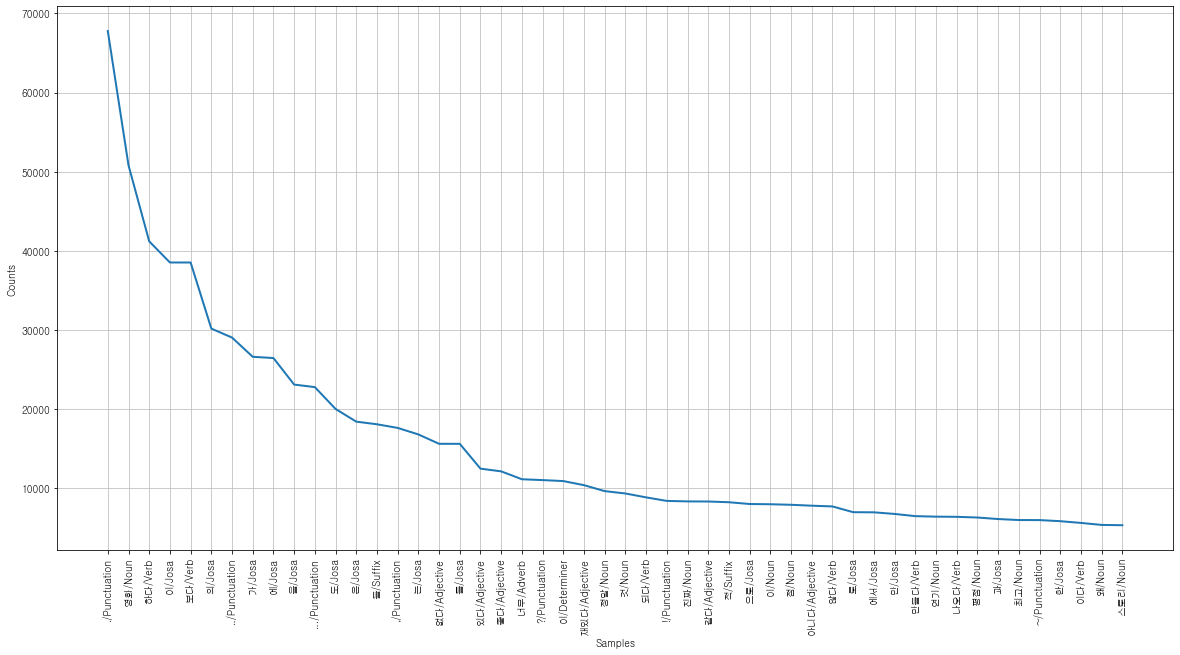

In [22]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'c:/windows/fonts/gulim.ttc'   
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [24]:
selected_words = [f[0] for f in text.vocab().most_common(1000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [25]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

## 모델 정의 및 학습

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),    # 
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
150000/150000 [==============================] - 2s 14us/sample - loss: 0.4307 - binary_accuracy: 0.8028
Epoch 2/10
150000/150000 [==============================] - 2s 12us/sample - loss: 0.3813 - binary_accuracy: 0.8233
Epoch 3/10
150000/150000 [==============================] - 2s 13us/sample - loss: 0.3668 - binary_accuracy: 0.8320
Epoch 4/10
150000/150000 [==============================] - 2s 13us/sample - loss: 0.3543 - binary_accuracy: 0.8393
Epoch 5/10
150000/150000 [==============================] - 2s 12us/sample - loss: 0.3426 - binary_accuracy: 0.8470
Epoch 6/10
150000/150000 [==============================] - 2s 13us/sample - loss: 0.3321 - binary_accuracy: 0.8522
Epoch 7/10
150000/150000 [==============================] - 2s 12us/sample - loss: 0.3209 - binary_accuracy: 0.8577
Epoch 8/10
150000/150000 [==============================] - 2s 12us/sample - loss: 0.3096 - binary_accuracy: 0.8646
Epoch 9/10
150000/150000 [==============================] - 2s 13us/samp

## 새로운 Review 데이터를 입력받을 함수 지정

In [31]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 긍정 리뷰라고 추측됩니다.".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 부정 리뷰라고 추측됩니다.".format(review, (1 - score) * 100))

## 새로운 Review 입력해서 결과 확인

In [32]:
predict_pos_neg("11000원짜리 침대")
predict_pos_neg("믿고 보는 감독이지만 이번에는 아니네요")
predict_pos_neg("주연배우 때문에 봤어요")
predict_pos_neg("이거를 돈 주고 본 내가 바보다")

[11000원짜리 침대]는 54.22% 확률로 부정 리뷰이지 않을까 추측해봅니다.
[믿고 보는 감독이지만 이번에는 아니네요]는 64.52% 확률로 긍정 리뷰이지 않을까 추측해봅니다.
[주연배우 때문에 봤어요]는 83.12% 확률로 부정 리뷰이지 않을까 추측해봅니다.
[이거를 돈 주고 본 내가 바보다]는 92.17% 확률로 부정 리뷰이지 않을까 추측해봅니다.
